In [1]:
# Install Libraries
# !pip install textblob
# !pip install tweepy

# Step 1: Install and Import Libraries

In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bruce\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Step 2: Authentication for Twitter API

In [2]:
# Authentication
consumerKey = "......"
consumerSecret = "......"
accessToken = "......"
accessTokenSecret = "......"
bearerToken = "......"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
# https://docs.tweepy.org/en/stable/api.html
# https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

# Step 3: Getting Tweets With Keyword or Hashtag

In [7]:
#Sentiment Analysis
def percentage(part,whole):
     return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

tweets = []
last_id = -1
max_tweets = 100

while len(tweets) < max_tweets:
    count = max_tweets - len(tweets)

    new_tweets = api.search_tweets(q=keyword, count=noOfTweet, max_id=str(last_id - 1) , tweet_mode="extended", lang = "en")
    if not new_tweets:
        break
    for tweet in new_tweets:
        #tweets.append(tweets)
        if "retweeted_status" in tweet.__dict__:
            tweets.append(tweet.retweeted_status.full_text)
        else:
            tweets.append(tweet.full_text)
    last_id = new_tweets[-1].id


for tweet in tweets:
    #print(tweet.text)
    #print(tweet.created_at)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Mehmet
Please enter how many tweets to analyze: 100


AttributeError: 'str' object has no attribute 'text'

In [9]:
#Sentiment Analysis
def percentage(part,whole):
     return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

tweets = []
last_id = -1
max_tweets = 100

while len(tweets) < max_tweets:
    count = max_tweets - len(tweets)

    new_tweets = api.search_tweets(q=keyword, count=noOfTweet, max_id=str(last_id - 1) , tweet_mode="extended", lang = "en")
    if not new_tweets:
        break
    for tweet in new_tweets:
        #tweets.append(tweets)
        if "retweeted_status" in tweet.__dict__:
            tweets.append(tweet.retweeted_status.full_text)
        else:
            tweets.append(tweet.full_text)
    last_id = new_tweets[-1].id


for tweet in tweets:
    #print(tweet.text)
    #print(tweet.created_at)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Mehmet
Please enter how many tweets to analyze: 100


In [ ]:
def determine_tweet_type(tweet):
    # Check for reply indicator first
    if tweet["in_reply_to_status_id"] is not None:
        tweet_type = "Reply Tweet"
    # Check boolean quote status field but make sure it's not a Retweet (of a Quote Tweet) 
    elif tweet["is_quote_status"] is True and not tweet["text"].startswith("RT"):
        tweet_type = "Quote Tweet"
    # Check both indicators of a Retweet
    elif tweet["text"].startswith("RT") and tweet.get("retweeted_status") is not None:
        tweet_type = "Retweet"
    else:
        tweet_type = "Original Tweet"
    return tweet_type 

def parse_tweets(status):
    for tweet in status:
        if "retweeted_status" in tweet.__dict__.keys():
            if "extended_tweet" in tweet.__dict__["retweeted_status"].__dict__.keys():
                full_text = tweet.__dict__["retweeted_status"].__dict__["extended_tweet"]["full_text"]
            else:
                full_text = tweet.__dict__["retweeted_status"].__dict__["text"]
        elif "extended_tweet" in tweet.__dict__.keys():
            full_text = tweet.__dict__["created_at"],tweet.__dict__["extended_tweet"]["full_text"]
        else:
            full_text = tweet.__dict__["created_at"],tweet.__dict__["text"]

        mydict = { "tweet_id": tweet._json["id_str"],
                       "date":tweet._json["created_at"],
                       "full_text": full_text,
                       "tweet_type": determine_tweet_type(tweet._json),
                        "reply_count": tweet._json["reply_count"], #Number of times Tweet has been replied to
                       "quote_count": tweet._json["quote_count"], #Number of times Tweet has been quoted
                       "likes_count": tweet._json["favorite_count"], #Number of times Tweet has been liked 
                       "retweet_counts": tweet._json["retweet_count"], #Number of times this Tweet has been retweeted
                       "hyperlink": "https://twitter.com/twitter/status/" + tweet._json["id_str"]
              }
        parsedTweets.append(mydict) # Add Tweet to parsedTweets list
        
parsedTweets = []
date_list = ['202210070000','202210080000','202210090000','202210100000','202210110000',
        '202210120000','202210130000','202210140000']

start_time = date_list[-7]
end_time = date_list[-6]

for page in tweepy.Cursor(api.search_30_day,label='30day', 
                          query="oz",
                          fromDate=start_time,
                          toDate=end_time).items(1):
    parse_tweets(page)

In [10]:
tweets

["Mehmet Oz attended a fundraiser yesterday where he gave a speech alongside a vehicle that belonged to Adolph Hitler.\n\nOz denies the Armenian genocide &amp; is now using Hitler memorabilia to fundraise.\n\nRepublicans don't even try to hide it anymore. We must elect John Fetterman.",
 "Just when I thought it was really odd that Mehmet Oz was attending a fundraiser yesterday in California when he is running in PA, we find out that it was in Santa Ana at the Lyon Air Museum &amp; Mehmet Oz gave his speech &amp; fundraised right next to Adolph Hitler's 1939 Mercedes-Benz.",
 'WATCH: Mehmet Oz was pro-choice as of 2019, only 3 years ago.\n\nNow he claims to support a total ban on abortion with no exceptions.\n\nHe cannot be trusted by either side.\n\n https://t.co/70sSRUdANE',
 'Two new advertisements by Make America Great Again aim at the opponents of former President Donald Trump-backed Dr. Mehmet Oz in Pennsylvania and J.D. Vance in Ohio. https://t.co/p20tq2LiFP',
 'WATCH: Mehmet Oz 

In [11]:
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [12]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  28
negative number:  64
neutral number:  8


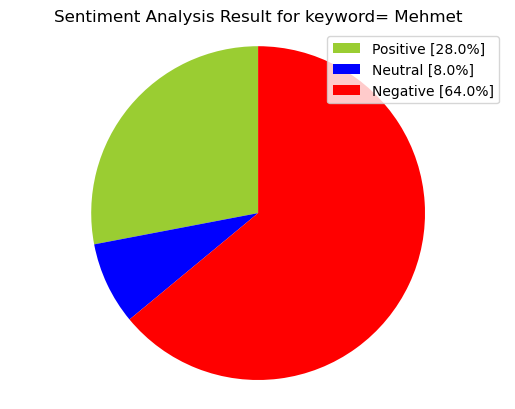

In [13]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis('equal')
plt.show()

In [14]:
tweet_list

,0
0,Mehmet Oz attended a fundraiser yesterday wher...
1,Just when I thought it was really odd that Meh...
2,"WATCH: Mehmet Oz was pro-choice as of 2019, on..."
3,Two new advertisements by Make America Great A...
4,"WATCH: Mehmet Oz was pro-choice as of 2019, on..."
...,...
95,"Yesterday, Mehmet Oz attended a fundraiser whe..."
96,Mehmet Oz likes to pretend that Fetterman used...
97,Marco Rubio\nRon Johnson\nHerschel Walker\nMeh...
98,Mehmet Oz attended a fundraiser yesterday wher...


# Step 4: Cleaning Tweets to Analyse Sentiment

In [15]:
tweet_list.drop_duplicates(inplace = True)

In [16]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Mehmet Oz attended a fundraiser yesterday wher...,mehmet oz attended a fundraiser yesterday wher...
1,Just when I thought it was really odd that Meh...,just when i thought it was really odd that meh...
2,"WATCH: Mehmet Oz was pro-choice as of 2019, on...",watch mehmet oz was pro choice as of 2019 on...
3,Two new advertisements by Make America Great A...,two new advertisements by make america great a...
5,Here's Mehmet Oz posing in front of one of Hit...,here s mehmet oz posing in front of one of hit...
9,"Pennsylvania, please remember it's John Fetter...",pennsylvania please remember it s john fetter...
10,You have to ask yourself why Mehmet Oz would s...,you have to ask yourself why mehmet oz would s...
11,Mehmet Oz is facing accusations of animal abus...,mehmet oz is facing accusations of animal abus...
12,Mehmet Oz Gives Speech Near Hitler's Car And C...,mehmet oz gives speech near hitler s car and c...
25,When do Mehmet Oz and Herschel Walker start sa...,when do mehmet oz and herschel walker start sa...


In [17]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Mehmet Oz attended a fundraiser yesterday wher...,mehmet oz attended a fundraiser yesterday wher...,0.800000,0.900000,negative,0.101,0.899,0.000,-0.5423
1,Just when I thought it was really odd that Meh...,just when i thought it was really odd that meh...,0.039683,0.261905,negative,0.048,0.952,0.000,-0.3804
2,"WATCH: Mehmet Oz was pro-choice as of 2019, on...",watch mehmet oz was pro choice as of 2019 on...,0.000000,0.875000,negative,0.220,0.710,0.071,-0.6862
3,Two new advertisements by Make America Great A...,two new advertisements by make america great a...,0.312121,0.401515,positive,0.000,0.828,0.172,0.6369
5,Here's Mehmet Oz posing in front of one of Hit...,here s mehmet oz posing in front of one of hit...,-0.233333,0.655556,positive,0.130,0.737,0.133,0.0258
9,"Pennsylvania, please remember it's John Fetter...",pennsylvania please remember it s john fetter...,0.468182,0.450000,positive,0.000,0.736,0.264,0.7269
10,You have to ask yourself why Mehmet Oz would s...,you have to ask yourself why mehmet oz would s...,0.247273,0.720000,neutral,0.000,1.000,0.000,0.0000
11,Mehmet Oz is facing accusations of animal abus...,mehmet oz is facing accusations of animal abus...,-0.180000,0.233333,negative,0.315,0.685,0.000,-0.9517
12,Mehmet Oz Gives Speech Near Hitler's Car And C...,mehmet oz gives speech near hitler s car and c...,0.100000,0.400000,neutral,0.000,1.000,0.000,0.0000
25,When do Mehmet Oz and Herschel Walker start sa...,when do mehmet oz and herschel walker start sa...,0.000000,0.000000,negative,0.172,0.828,0.000,-0.3612


# Step 5: EDA on Sentiment Analysis

In [18]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [19]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [20]:
#Count_values for sentiment
pc = count_values_in_column(tw_list,"sentiment")
pc

,Total,Percentage
negative,14,51.85
positive,7,25.93
neutral,6,22.22


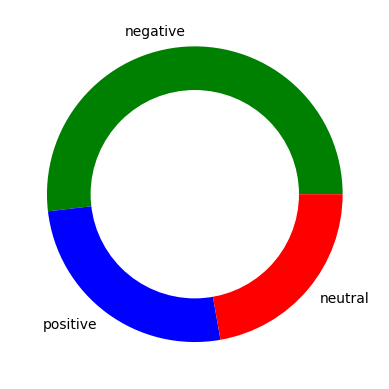

In [21]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [22]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


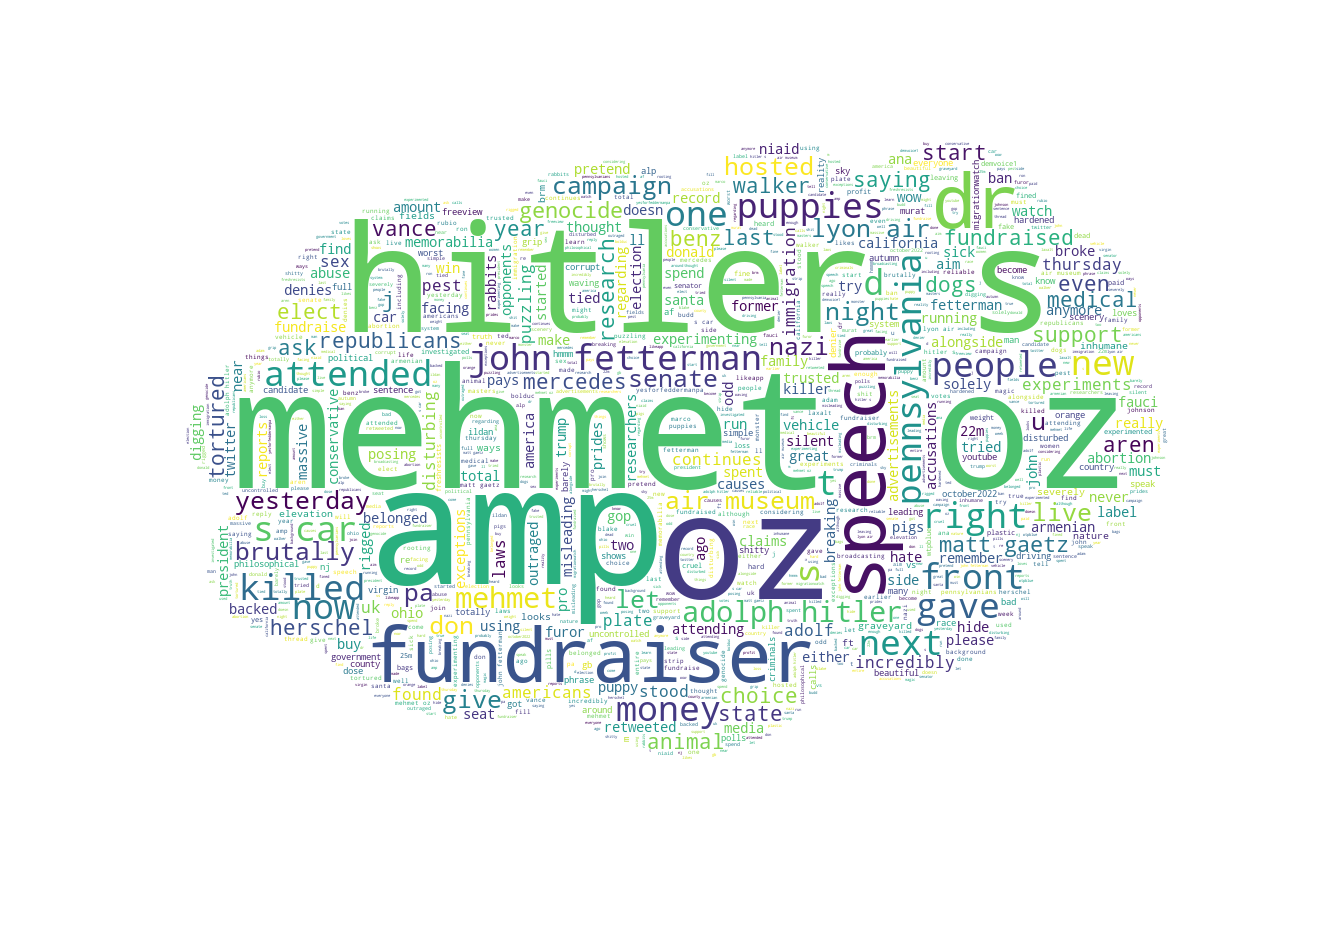

In [23]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


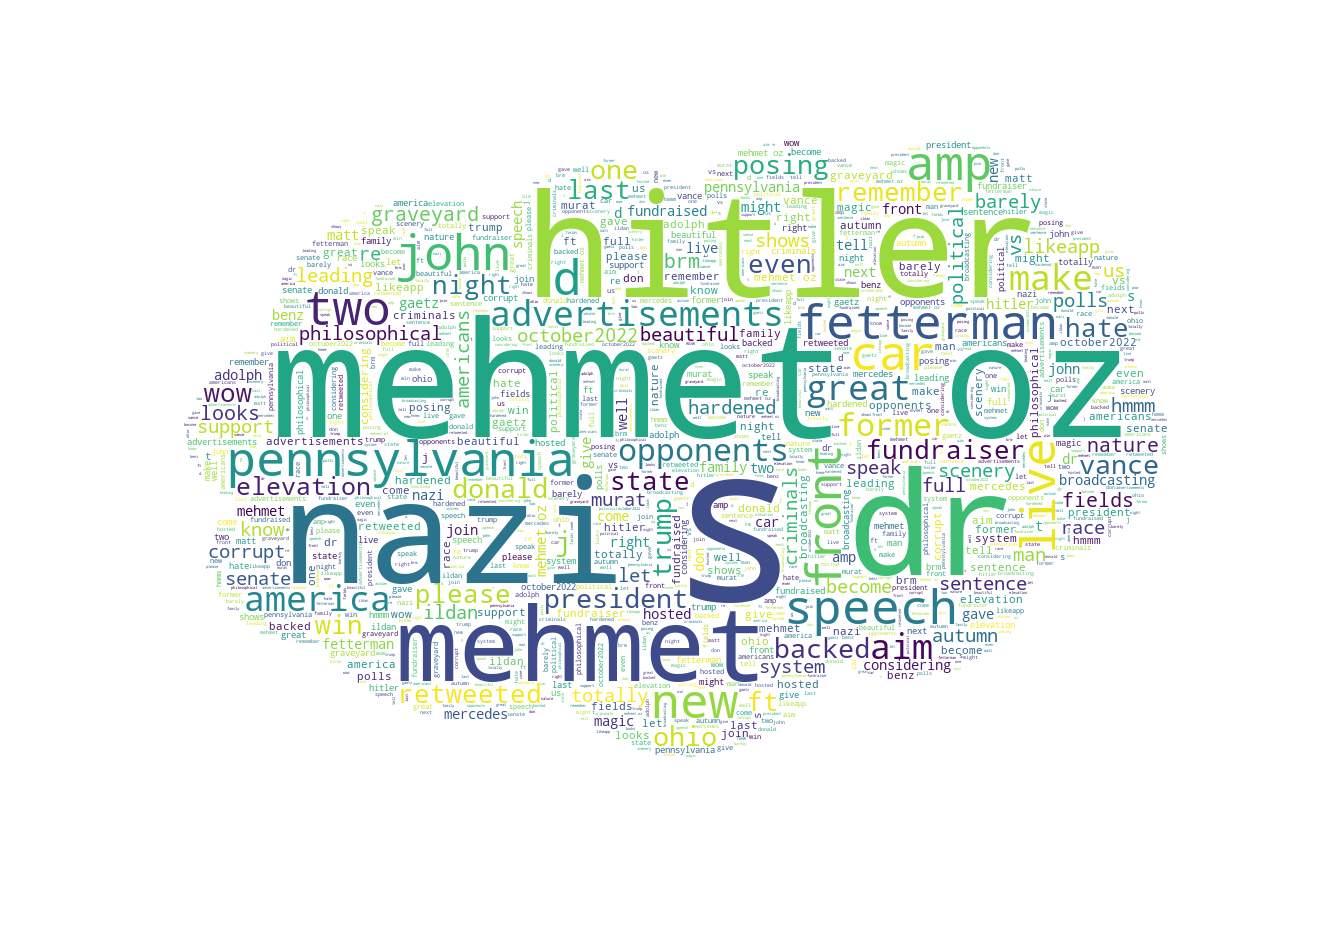

In [24]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


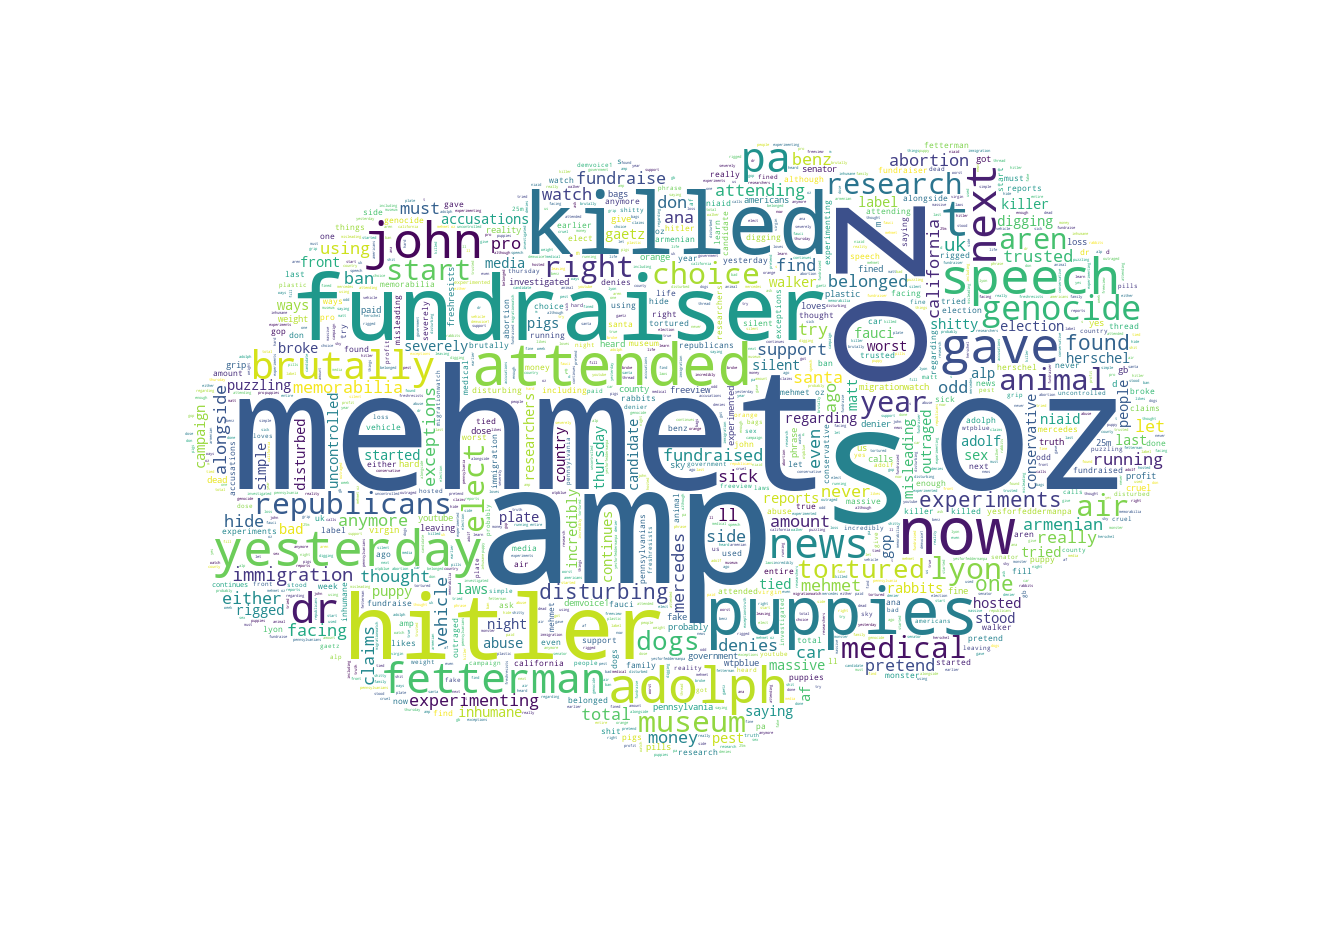

In [25]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


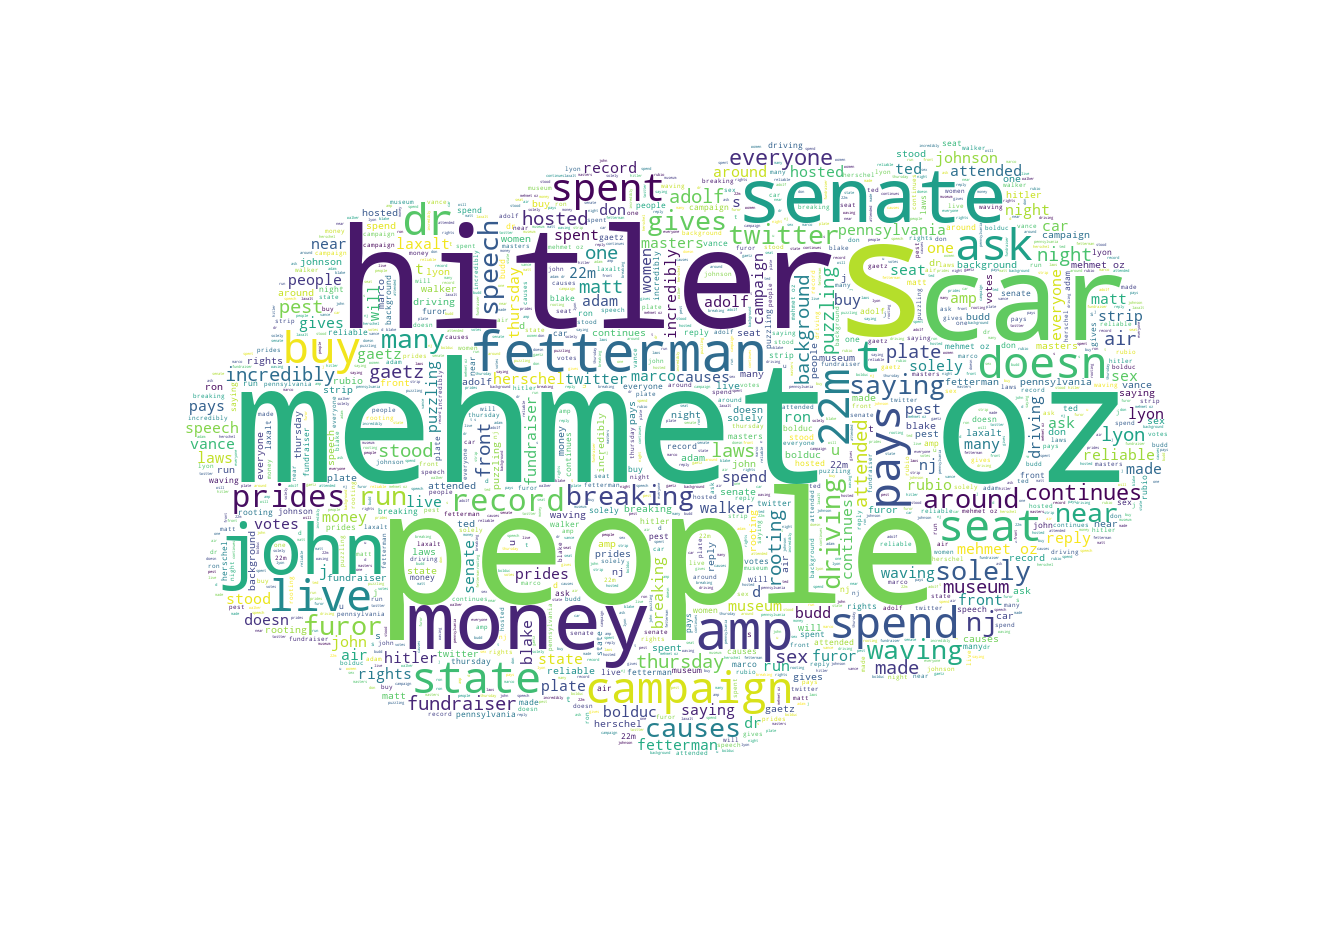

In [26]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [27]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [28]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,228.43
neutral,167.67
positive,169.29


In [29]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,40.21
neutral,32.00
positive,30.14


In [30]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [31]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [32]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [33]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [34]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [35]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Mehmet Oz attended a fundraiser yesterday wher...,mehmet oz attended a fundraiser yesterday wher...,0.800000,0.900000,negative,0.101,0.899,0.000,-0.5423,279,46,mehmet oz attended a fundraiser yesterday wher...,"[mehmet, oz, attended, a, fundraiser, yesterda...","[mehmet, oz, attended, fundraiser, yesterday, ...","[mehmet, oz, attend, fundrais, yesterday, gave..."
1,Just when I thought it was really odd that Meh...,just when i thought it was really odd that meh...,0.039683,0.261905,negative,0.048,0.952,0.000,-0.3804,288,55,just when i thought it was really odd that meh...,"[just, when, i, thought, it, was, really, odd,...","[thought, really, odd, mehmet, oz, attending, ...","[thought, realli, odd, mehmet, oz, attend, fun..."
2,"WATCH: Mehmet Oz was pro-choice as of 2019, on...",watch mehmet oz was pro choice as of 2019 on...,0.000000,0.875000,negative,0.220,0.710,0.071,-0.6862,173,33,watch mehmet oz was pro choice as of only ...,"[watch, mehmet, oz, was, pro, choice, as, of, ...","[watch, mehmet, oz, pro, choice, years, ago, c...","[watch, mehmet, oz, pro, choic, year, ago, cla..."
3,Two new advertisements by Make America Great A...,two new advertisements by make america great a...,0.312121,0.401515,positive,0.000,0.828,0.172,0.6369,167,29,two new advertisements by make america great a...,"[two, new, advertisements, by, make, america, ...","[two, new, advertisements, make, america, grea...","[two, new, advertis, make, america, great, aim..."
5,Here's Mehmet Oz posing in front of one of Hit...,here s mehmet oz posing in front of one of hit...,-0.233333,0.655556,positive,0.130,0.737,0.133,0.0258,126,27,here s mehmet oz posing in front of one of hit...,"[here, s, mehmet, oz, posing, in, front, of, o...","[mehmet, oz, posing, front, one, hitler, cars,...","[mehmet, oz, pose, front, one, hitler, car, fu..."


In [36]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

27 Number of reviews has 313 words


In [37]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

C:\Users\bruce\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,abort,abus,accus,adam,adolf,adolph,advertis,af,ago,...,women,worst,would,wow,wtpblue,ye,year,yesforfeddermanpa,yesterday,youtub
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
,32
mehmet,29
amp,14
hitler,11
fundrais,10
dr,7
fetterman,7
john,7
car,7
speech,6


In [39]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('mehmet oz', 26),
 ('john fetterman', 6),
 ('dr mehmet', 5),
 ('oz attended', 4),
 ('gave speech', 4),
 ('adolph hitler', 4),
 ('lyon air', 3),
 ('air museum', 3),
 ('hitler cars', 3),
 ('hitler car', 3),
 ('amp killed', 3),
 ('matt gaetz', 3),
 ('attended fundraiser', 2),
 ('fundraiser yesterday', 2),
 ('oz gave', 2),
 ('speech amp', 2),
 ('amp fundraised', 2),
 ('fundraised right', 2),
 ('right adolph', 2),
 ('hitler 1939', 2)]

In [41]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('dr mehmet oz', 5),
 ('mehmet oz attended', 4),
 ('lyon air museum', 3),
 ('oz attended fundraiser', 2),
 ('mehmet oz gave', 2),
 ('oz gave speech', 2),
 ('gave speech amp', 2),
 ('speech amp fundraised', 2),
 ('amp fundraised right', 2),
 ('fundraised right adolph', 2),
 ('right adolph hitler', 2),
 ('adolph hitler 1939', 2),
 ('hitler 1939 mercedes', 2),
 ('1939 mercedes benz', 2),
 ('mehmet oz pennsylvania', 2),
 ('brutally tortured amp', 2),
 ('tortured amp killed', 2),
 ('mehmet oz killed', 2),
 ('continues incredibly puzzling', 2),
 ('incredibly puzzling campaign', 2)]